In [1]:
import pandas as pd

file_path ="breast-cancer-wisconsin-data.csv"
df_breast = pd.read_csv(file_path)

df_breast = pd.read_csv(file_path)

print(df_breast.info())
print(df_breast.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [2]:
from sklearn.preprocessing import LabelEncoder

if "id" in df_breast.columns:
    df_breast.drop(columns=["id"], inplace=True)

if "diagnosis" in df_breast.columns:
    df_breast["diagnosis"] = LabelEncoder().fit_transform(df_breast["diagnosis"])

print(df_breast.isnull().sum())

df_breast.fillna(df_breast.median(), inplace=True)


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
print(df_breast.nunique())


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


In [4]:
import numpy as np

for column in ["radius_mean", "texture_mean", "perimeter_mean", "area_mean",
               "smoothness_mean", "compactness_mean", "concavity_mean", "symmetry_mean"]:
    df_breast[column] = pd.cut(df_breast[column], bins=3, labels=["Low", "Medium", "High"])

print(df_breast.head()) 


   diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0          1      Medium          Low         Medium    Medium   
1          1      Medium          Low         Medium    Medium   
2          1      Medium       Medium         Medium    Medium   
3          1         Low       Medium            Low       Low   
4          1      Medium          Low         Medium    Medium   

  smoothness_mean compactness_mean concavity_mean  concave points_mean  \
0          Medium             High           High              0.14710   
1             Low              Low            Low              0.07017   
2          Medium           Medium         Medium              0.12790   
3            High             High         Medium              0.10520   
4          Medium           Medium         Medium              0.10430   

  symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0          High  ...         25.38          17.33           184.60   
1        Medium  .

In [5]:
columns_to_discretize = [
    "concave points_mean", "fractal_dimension_mean"
]

for column in columns_to_discretize:
    df_breast[column] = pd.cut(df_breast[column], bins=3, labels=["Low", "Medium", "High"])


In [6]:
print(df_breast.dtypes)


diagnosis                     int32
radius_mean                category
texture_mean               category
perimeter_mean             category
area_mean                  category
smoothness_mean            category
compactness_mean           category
concavity_mean             category
concave points_mean        category
symmetry_mean              category
fractal_dimension_mean     category
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

In [8]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianNetwork([
    ("radius_mean", "diagnosis"),
    ("texture_mean", "diagnosis"),
    ("perimeter_mean", "diagnosis"),
    ("area_mean", "diagnosis"),
    ("smoothness_mean", "diagnosis"),
    ("compactness_mean", "diagnosis"),
    ("concavity_mean", "diagnosis"),
    ("symmetry_mean", "diagnosis")
])

model.fit(df_breast, estimator=MaximumLikelihoodEstimator)
print("Bayesian Network Model Trained Successfully!")


Bayesian Network Model Trained Successfully!


In [9]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(df_breast, estimator=MaximumLikelihoodEstimator)

print(model.get_cpds())


[<TabularCPD representing P(radius_mean:3) at 0x2a5f393bed0>, <TabularCPD representing P(diagnosis:2 | area_mean:3, compactness_mean:3, concavity_mean:3, perimeter_mean:3, radius_mean:3, smoothness_mean:3, symmetry_mean:3, texture_mean:3) at 0x2a5f3189490>, <TabularCPD representing P(texture_mean:3) at 0x2a5f3188e50>, <TabularCPD representing P(perimeter_mean:3) at 0x2a5f392a210>, <TabularCPD representing P(area_mean:3) at 0x2a5f3185610>, <TabularCPD representing P(smoothness_mean:3) at 0x2a5f393dc90>, <TabularCPD representing P(compactness_mean:3) at 0x2a5f393c290>, <TabularCPD representing P(concavity_mean:3) at 0x2a5f393f9d0>, <TabularCPD representing P(symmetry_mean:3) at 0x2a5f393ed50>]



Enter tumor characteristics:
1: radius mean
2: texture mean
3: perimeter mean
4: area mean
5: smoothness mean
6: compactness mean
7: concavity mean
8: symmetry mean

Breast Cancer Probability:
Benign: 97.06%
Malignant: 2.94%


C:\Users\DELL\AppData\Local\Temp\ipykernel_16696\2453380272.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=probs, palette=["green", "red"])


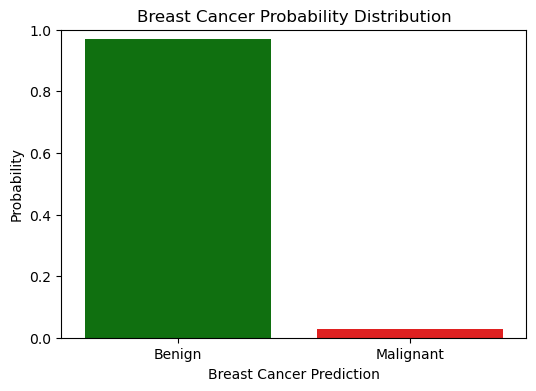

In [11]:
from pgmpy.inference import VariableElimination
import seaborn as sns
import matplotlib.pyplot as plt

inference = VariableElimination(model)

feature_mapping = {
    1: "radius_mean",
    2: "texture_mean",
    3: "perimeter_mean",
    4: "area_mean",
    5: "smoothness_mean",
    6: "compactness_mean",
    7: "concavity_mean",
    8: "symmetry_mean"
}

def predict_breast_cancer():
    print("\nEnter tumor characteristics:")
    for num, feature in feature_mapping.items():
        print(f"{num}: {feature.replace('_', ' ')}")

    selected_nums = input("\nEnter feature numbers and values (e.g., 1:Low,3:High,5:Medium): ")
    
    evidence = {}
    for item in selected_nums.split(","):
        num, value = item.split(":")
        evidence[feature_mapping[int(num)]] = value 

    query_result = inference.query(variables=["diagnosis"], evidence=evidence)
    
    probs = query_result.values
    labels = ["Benign", "Malignant"]

    print("\nBreast Cancer Probability:")
    for label, prob in zip(labels, probs):
        print(f"{label}: {prob:.2%}")

    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=probs, palette=["green", "red"])
    plt.xlabel("Breast Cancer Prediction")
    plt.ylabel("Probability")
    plt.title("Breast Cancer Probability Distribution")
    plt.ylim(0, 1)
    plt.show()

predict_breast_cancer()
